<a href="https://colab.research.google.com/github/champsleague/Machine-Learning-Projects/blob/main/ML_week1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

[['sw' '2' 'F' '20']
 ['math' '3' 'M' '20']
 ['art' '3' 'F' '15']
 ['english' '3' 'M' '28']
 ['math' '3' 'F' '26']
 ['english' '3' 'M' '17']
 ['math' '3' 'F' '26']
 ['sw' '3' 'F' '40']
 ['sw' '3' 'M' '33']
 ['english' '3' 'M' '18']
 ['math' '3' 'M' '25']
 ['math' '3' 'F' '30']
 ['sw' '3' 'F' '45']
 ['art' '3' 'F' '20']]
[[2]
 [3]
 [3]
 [3]
 [3]
 [3]
 [3]
 [3]
 [3]
 [3]
 [3]
 [3]
 [3]
 [3]]
['20' '20' '15' '28' '26' '17' '26' '40' '33' '18' '25' '30' '45' '20']
Predicted value:  26



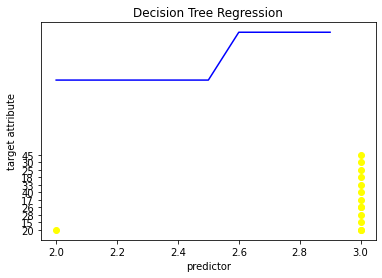

In [49]:
from sklearn.model_selection import train_test_split
from sklearn import datasets
from sklearn.tree import DecisionTreeRegressor
import sklearn
import numpy as np
import pandas as pd

# import dataset and read,print data
dataset = np.array(
[['sw', 2, 'F',20],
 ['math', 3, 'M',20],
 ['art', 3, 'F',15],
 ['english', 3, 'M',28],
 ['math', 3, 'F',26],
 ['english', 3, 'M',17],
 ['math', 3, 'F',26],
 ['sw', 3, 'F',40],
 ['sw', 3, 'M',33],
 ['english', 3, 'M',18],
 ['math', 3, 'M',25],
 ['math', 3, 'F',30],
 ['sw', 3, 'F',45],
 ['art', 3, 'F',20],
])

print(dataset)

# select all rows by : and column 1
#print 2nd column
X = dataset[:, 1:2].astype(int) 
print(X)

# select all rows by : and column 4
#print 4th column
y = dataset[:, 3].astype(str) 
print(y)


# import the regressor
from sklearn.tree import DecisionTreeRegressor 
  
# define tree regressor 
regressor = DecisionTreeRegressor(random_state = 0) 
  
# fit the regressor with X and Y data
regressor.fit(X, y)


# predicting a new value
# test the output by changing values (e.g. 400)
y_pred = regressor.predict([[400]])
  
# print the predicted value
print("Predicted value: % d\n"% y_pred)



# arange  creating value ranges
# from min value of X to max value of X 
import matplotlib.pyplot as plt

X_grid = np.arange(min(X), max(X), 0.1)
  

# column out of the X_grid values
X_grid = X_grid.reshape((len(X_grid), 1)) 
  
# scatter plot for data
plt.scatter(X, y, color = 'yellow')
  
# plot predicted data
plt.plot(X_grid, regressor.predict(X_grid), color = 'blue') 
  
plt.title('Decision Tree Regression') 
plt.xlabel('predictor')
plt.ylabel('target attribute')
plt.show()


# import export_graphviz
from sklearn.tree import export_graphviz

# export the decision tree to an excel file
# for visualizing the plot easily anywhere
export_graphviz(regressor, out_file ='week1-1.xlsx',
			feature_names =['predictor'])



In [47]:
from google.colab import files
myfile = files.upload()

Saving week1-1.xlsx to week1-1 (1).xlsx


In [31]:
# Run this program on your local python
# interpreter, provided you have installed
# the required libraries.

import io
# Importing the required packages
import numpy as np
import pandas as pd
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

# Function importing Dataset
def importdata():
	balance_data = pd.read_excel('week1-1.xlsx')
	
	# Printing the dataswet shape
	print ("Dataset Length: ", len(balance_data))
	print ("Dataset Shape: ", balance_data.shape)
	
	# Printing the dataset obseravtions
	print ("Dataset: ",balance_data.head())
	return balance_data

# Function to split the dataset
def splitdataset(balance_data):

	# Separating the target variable
	X = balance_data.values[:, 0:2]
	Y = balance_data.values[:, 0]

	# Splitting the dataset into train and test
	X_train, X_test, y_train, y_test = train_test_split(
	X, Y, test_size = 0.3, random_state = 100)
	
	return X, Y, X_train, X_test, y_train, y_test
	
# Function to perform training with giniIndex.
def train_using_gini(X_train, X_test, y_train):

	# Creating the classifier object
	clf_gini = DecisionTreeClassifier(criterion = "gini",
			random_state = 100,max_depth=6, min_samples_leaf=5)

	# Performing training
	clf_gini.fit(X_train, y_train)
	return clf_gini
	
# Function to perform training with entropy.
def tarin_using_entropy(X_train, X_test, y_train):

	# Decision tree with entropy
	clf_entropy = DecisionTreeClassifier(
			criterion = "entropy", random_state = 100,
			max_depth = 3, min_samples_leaf = 5)

	# Performing training
	clf_entropy.fit(X_train, y_train)
	return clf_entropy


# Function to make predictions
def prediction(X_test, clf_object):

	# Predicton on test with giniIndex
	y_pred = clf_object.predict(X_test)
	print("Predicted values:")
	print(y_pred)
	return y_pred
	
# Function to calculate accuracy
def cal_accuracy(y_test, y_pred):
	
	print("Confusion Matrix: ",
		confusion_matrix(y_test, y_pred))
	
	print ("Accuracy : ",
	accuracy_score(y_test,y_pred)*100)
	
	print("Report : ",
	classification_report(y_test, y_pred))

# Driver code
def main():
	
	# Building Phase
	data = importdata()
	X, Y, X_train, X_test, y_train, y_test = splitdataset(data)
	clf_gini = train_using_gini(X_train, X_test, y_train)
	clf_entropy = tarin_using_entropy(X_train, X_test, y_train)
	
	# Operational Phase
	print("Results Using Gini Index:")
	
	# Prediction using gini
	y_pred_gini = prediction(X_test, clf_gini)
	cal_accuracy(y_test, y_pred_gini)
	
	print("Results Using Entropy:")
	# Prediction using entropy
	y_pred_entropy = prediction(X_test, clf_entropy)
	cal_accuracy(y_test, y_pred_entropy)
	
	
# Calling main function
if __name__=="__main__":
	main()


Dataset Length:  14
Dataset Shape:  (14, 4)
Dataset:       major  year gender  hours
0       sw     2      f     20
1     math     3      m     20
2      art     3      f     15
3  english     3      m     28
4     math     3      f     26


ValueError: ignored